In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten, kmeans2

%matplotlib inline


In [2]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'c52b7825851b4357af3e06c1888152f0' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [3]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/583/players'},
   'self': {'href

In [8]:
for team in teams:
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    goals = 0
    missed_goals = 0
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            goals += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
            missed_goals += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
        else:
            goals += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
            missed_goals += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
    print('Team "{}", {} missed goals, {} goals'.format(team['name'], missed_goals, goals))
    team['missed_goals'] = missed_goals
    team['goals'] = goals

Team "FC Rio Ave", 1 missed goals, 3 goals
Team "FC Porto", 0 missed goals, 5 goals
Team "Moreirense FC", 1 missed goals, 1 goals
Team "FC Paços de Ferreira", 3 missed goals, 2 goals
Team "Sporting CP", 0 missed goals, 3 goals
Team "Maritimo Funchal", 1 missed goals, 1 goals
Team "CD Tondela", 2 missed goals, 1 goals
Team "SL Benfica", 1 missed goals, 4 goals
Team "Boavista Porto FC", 4 missed goals, 2 goals
Team "FC Arouca", 57 missed goals, 33 goals
Team "Vitoria Setubal", 2 missed goals, 1 goals
Team "C.F. Os Belenenses", 1 missed goals, 1 goals
Team "Vitoria Guimaraes", 5 missed goals, 3 goals
Team "Sporting Braga", 4 missed goals, 3 goals
Team "GD Estoril Praia", 4 missed goals, 3 goals
Team "Feirense", 1 missed goals, 1 goals
Team "Nacional Funchal", 58 missed goals, 22 goals
Team "G.D. Chaves", 4 missed goals, 2 goals


In [9]:
team_for_pd = []
for team in teams:
    if team['missed_goals']:
        team_for_pd.append({'name': team['name'], 'missed_goals': team['missed_goals'], 'goals': team['goals']})
team_for_pd



[{'goals': 3, 'missed_goals': 1, 'name': 'FC Rio Ave'},
 {'goals': 1, 'missed_goals': 1, 'name': 'Moreirense FC'},
 {'goals': 2, 'missed_goals': 3, 'name': 'FC Paços de Ferreira'},
 {'goals': 1, 'missed_goals': 1, 'name': 'Maritimo Funchal'},
 {'goals': 1, 'missed_goals': 2, 'name': 'CD Tondela'},
 {'goals': 4, 'missed_goals': 1, 'name': 'SL Benfica'},
 {'goals': 2, 'missed_goals': 4, 'name': 'Boavista Porto FC'},
 {'goals': 33, 'missed_goals': 57, 'name': 'FC Arouca'},
 {'goals': 1, 'missed_goals': 2, 'name': 'Vitoria Setubal'},
 {'goals': 1, 'missed_goals': 1, 'name': 'C.F. Os Belenenses'},
 {'goals': 3, 'missed_goals': 5, 'name': 'Vitoria Guimaraes'},
 {'goals': 3, 'missed_goals': 4, 'name': 'Sporting Braga'},
 {'goals': 3, 'missed_goals': 4, 'name': 'GD Estoril Praia'},
 {'goals': 1, 'missed_goals': 1, 'name': 'Feirense'},
 {'goals': 22, 'missed_goals': 58, 'name': 'Nacional Funchal'},
 {'goals': 2, 'missed_goals': 4, 'name': 'G.D. Chaves'}]

In [10]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,goals,missed_goals,name
0,3,1,FC Rio Ave
1,1,1,Moreirense FC
2,2,3,FC Paços de Ferreira
3,1,1,Maritimo Funchal
4,1,2,CD Tondela
5,4,1,SL Benfica
6,2,4,Boavista Porto FC
7,33,57,FC Arouca
8,1,2,Vitoria Setubal
9,1,1,C.F. Os Belenenses


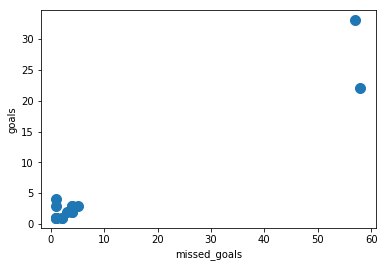

In [12]:
teams_pd.plot.scatter(x='missed_goals', y='goals', s=100)

In [13]:
del teams_pd['name']
teams_pd

,goals,missed_goals
0,3,1
1,1,1
2,2,3
3,1,1
4,1,2
5,4,1
6,2,4
7,33,57
8,1,2
9,1,1


In [14]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 0.3446288 ,  0.05475119],
       [ 0.11487627,  0.05475119],
       [ 0.22975253,  0.16425358],
       [ 0.11487627,  0.05475119],
       [ 0.11487627,  0.10950239],
       [ 0.45950506,  0.05475119],
       [ 0.22975253,  0.21900477],
       [ 3.79091678,  3.12081803],
       [ 0.11487627,  0.10950239],
       [ 0.11487627,  0.05475119],
       [ 0.3446288 ,  0.27375597],
       [ 0.3446288 ,  0.21900477],
       [ 0.3446288 ,  0.21900477],
       [ 0.11487627,  0.05475119],
       [ 2.52727786,  3.17556922],
       [ 0.22975253,  0.21900477]])

In [16]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 3.15909732,  3.14819362],
        [ 0.31590973,  0.17794138],
        [ 0.11487627,  0.07300159]]),
 array([1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1]))

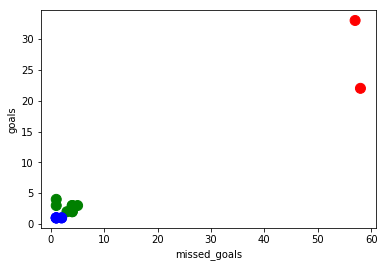

In [17]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='missed_goals', y='goals', c=colors, s=100)

In [34]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

E:\Anaconda\lib\site-packages\scipy\cluster\vq.py:660: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


(array([[ 0.22975253,  0.13296718],
        [ 1.2777772 ,  1.470481  ],
        [ 1.06876527,  1.1481979 ],
        [ 3.15909732,  3.14819362],
        [-1.81896669, -2.01908438]]),
 array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0]))

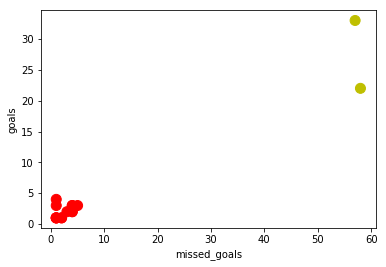

In [35]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='missed_goals', y='goals', c=colors, s=100)